# Chapter 5 - Resampling Methods Exercise

#### Student ID: 雖然不影響助教改題目但請各位寫一下學號

#### Name: 雖然不影響助教改題目但請各位寫一下名字

## Conceptual

### Q1: We now review bootstrap method. (8 point)

(a) Assume that we obtain a simple random sample (sample without replacement) from a set of n observation with sample size being $m$. What is the probability that the first sampled observation is *not* the $j$th observation from the original set? What is the probability that neither the first nor the second sampled observation is the $j$th observation from the original set? (1 point, 1 point)

> Ans: $(1-\frac{1}{n})$. $(1-\frac{2}{n})$.

(b) Assume that we obtain a bootstrap sample from a set of n observation. What is the probability that the first bootstrap observation is *not* the $j$th observation from the original set? What is the probability that neither the first nor the second bootstrap observation is the $j$th observation from the original set? (1 point, 1 point)

> Ans: $(1-\frac{1}{n})$. $\left(1-\frac{1}{n}\right)^2$.

(c) Which sampling method is used to find a random subset from the data sample, simple random sample or bootstrap sample? Which sampling method is used to find a new random sample that approximate the true population, simple random sample or bootstrap sample? (1 point, 1 point)

> Ans: Simple random sample. Bootstrap sample.

(d) If we obtain a bootstrap sample from a set of n observation, what is the probability that the $j$th observation is *not* in the bootstrap sample? (1 point)

> Ans: $\left(1-\frac{1}{n}\right)^n$.

(e) If we obtain a bootstrap sample from a extremely large set of observation, what is the probability that the $j$th observation is in the bootstrap sample? Write the probability using $1$ and $e$. (Hint: Something related to $e^{-1}$.) (1 point)

> Ans: $1-e^{-1}$.

### Q2: We now review cross-validation. (10 point)

Two types of cross-validation can be distinguished: exhaustive and non-exhaustive cross-validation.
Exhaustive cross-validation methods refer to methods that try all possible ways to divide the original sample into a training and a validation set, while non-exhaustive cross validation methods try only several possible ways.

(a) For validation set approach (holdout method), k-fold, and LOOCV, which of the cross-validation method are exhaustive? (1 point for each cross-validation, 3 point total)

> Ans: LOOCV. (多寫 k-fold if k=n 給對，但因為一般會稱 k-fold k=n 為 LOOCV，所以不需要寫這個)

(b) When we implement k-fold cross-validation, how many non-overlapping equal parts do we need to devided into? (1 point)

> Ans: k. (寫 $1<k<n$ 不扣分，寫一般取多少不扣分)

(c) Which of the cross-validation is the fastest and which is the slowest between validation set approach, k-fold, and LOOCV? (1 point, 1 point)

> Ans: fastest: validation set approach. slowest: LOOCV.

(d) Which of the cross-validation may tends to overestimate the test error, k-fold or validation set approach? (2 point)

 
> Ans:  validation set approach.

(e) Which of the cross-validation has less bias but more variance, validation set approach or LOOCV? (2 point)

 
> Ans: LOOCV.

## Applied

### Q3: We will now perform cross-validation on a simulated data set. (10 point)

(a) Generate a simulated data set as follows:

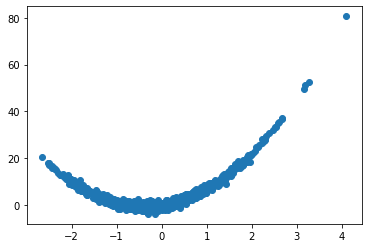

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

x = np.sort(np.random.normal(size=1000))
y = 3*x + 4*x**2 + np.random.normal(size=1000)
x = x.reshape(-1,1)
plt.scatter(x, y)

Write out the model used to generate the data in equation form. (1 point)

 
> Ans: $y=3x+4x^2+ϵ$

(b) Compute the $\operatorname{LOOCV}$ errors from the following four models using least squares:

> 1. Y = $\beta_0+\beta_1X+\epsilon$<br>
> 2. Y = $\beta_0+\beta_1X+\beta_2X^2+\epsilon$<br>
> 3. Y = $\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon$<br>
> 4. Y = $\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\beta_4X^4+\epsilon$.

*Note that you can only modify code that have been underlined.*

會把資料弄成次方項放入線性迴歸，或直接使用多項式迴歸 (2 point)  
會使用 LOOCV 分資料 (1 point)  
會正確的只把各個模型的 errors 算平均 (1 point)  
程式碼有跑出結果(上面的錯導致跑錯結果不會扣在這) (1 point)   
更改沒畫底線的程式碼會倒扣 1 分

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

np.random.seed(42)

for i in range(1, 4+1): # i is the number of models
    poly = PolynomialFeatures(i, include_bias=False)
    predictors = poly.fit_transform(x)

    lr = LinearRegression()
    error = -1 * cross_val_score(lr, predictors, y, cv = len(x), scoring = 'neg_mean_squared_error').mean()
    
    print('For the model {} , MSE is {}'.format(i, error))

For the model 1 , MSE is 37.67593268683857
For the model 2 , MSE is 0.9526578995621189
For the model 3 , MSE is 0.9537449802453368
For the model 4 , MSE is 0.9541133671183821


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

np.random.seed(42)

for i in range(1, 4+1): # i is the number of models
    lm = LinearRegression()
    loocv = LeaveOneOut()
    errors = []
    for train_index, test_index in loocv.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        poly = PolynomialFeatures(i, include_bias=False)
        x_train = poly.fit_transform(x_train)
        x_test = poly.fit_transform(x_test)
        
        lm_fit = lm.fit(x_train, y_train)
        lm_predict = lm_fit.predict(x_test)
        
        errors.append(mean_squared_error(y_test, lm_predict))
    error = np.mean(errors)
    
    print('For the model {} , MSE is {}'.format(i, error))

For the model 1 , MSE is 37.67593268683857
For the model 2 , MSE is 0.9526578995621189
For the model 3 , MSE is 0.9537449802453368
For the model 4 , MSE is 0.9541133671183821


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

np.random.seed(42)

for i in range(1, 4+1): # i is the number of models
    errors = []
    loo = LeaveOneOut()
    df = pd.DataFrame({'x':x.T[0], 'y':y})

    for train, test in loo.split(df):
        X_train, X_test = df['x'][train], df['x'][test]
        y_train, y_test = df['y'][train], df['y'][test]

        X_train = X_train.values.reshape(-1,1)
        X_test = X_test.values.reshape(-1,1)

        # Pipeline
        model = Pipeline([('poly', PolynomialFeatures(degree = i)),
                      ('linear', LinearRegression())]) 
        model.fit(X_train, y_train)
        # MSE
        score = mean_squared_error(y_test, model.predict(X_test))
        errors.append(score)
    error = np.mean(errors)

    print('For the model {} , MSE is {}'.format(i, error))

For the model 1 , MSE is 37.675932686838564
For the model 2 , MSE is 0.9526578995621185
For the model 3 , MSE is 0.9537449802453359
For the model 4 , MSE is 0.9541133671183831


(c) Repeat (b) using another random seed. Are your results the same as what you got in (c)? Why?  

*Note that the code that have been underlined may be the same as the code in* (b)*.*

因為程式碼理論上跟上面一樣，所以不扣程式碼的分。  
(1 point, 1 point)

In [ ]:
np.random.seed(1)

for i in range(1, 4+1): # i is the number of models
    poly = PolynomialFeatures(i, include_bias=False)
    predictors = poly.fit_transform(x)

    lr = LinearRegression()
    error = -1 * cross_val_score(lr, predictors, y, cv = len(x), scoring = 'neg_mean_squared_error').mean()
    
    print('For the model {} , MSE is {}'.format(i, error))

For the model 1 , MSE is 37.67593268683857
For the model 2 , MSE is 0.9526578995621189
For the model 3 , MSE is 0.9537449802453368
For the model 4 , MSE is 0.9541133671183821


> Ans: Yes. Because LOOCV is exhaustive. 這題解釋只要有提到隨機種子或隨機性就算對了

(d) Which of the models in (b) had the smallest $\operatorname{LOOCV}$ error? Is this what you expected? (1 point, 1 point)

> Ans: 2. Yes.

(e) <span style="color:red">Bonus(加分題)</span>. Compute the errors from the model with the smallest LOOCV error in (b) using K-fold with shuffle and without shuffle. Comment on what you found.

架構會（會寫 KFold 的迴圈） (1 point)  
程式碼有跑出合理結果 (1 point)  
發現有 shuffle 的 KFold 跟 LOOCV 差不多 (1 point)  
發現 KFold 速度比 LOOCV 快 (1 point)  
發現沒 shuffle 的資料有比較大的 error (1 point)  
發現前一個事件發生的理由是因為資料有經排序(或有給出差不多的解釋) (1 point)  
最多 4 point

In [ ]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 5, shuffle = False) 
error = []
for train_index, test_index in kf.split(x):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    
    # Pipeline
    model = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                      ('linear', LinearRegression())]) 
    model.fit(X_train, y_train)
    # MSE
    score = mean_squared_error(y_test, model.predict(X_test))
    error.append(score)
        
# print('For the model {} , MSE is {}'.format(i, error),'\n\n')
print('Model %i (MSE): %f' % (2,np.mean(error)))

Model 2 (MSE): 1.009220


In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state=1) 
error = []
for train_index, test_index in kf.split(x):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    
    # Pipeline
    model = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                      ('linear', LinearRegression())]) 
    model.fit(X_train, y_train)
    # MSE
    score = mean_squared_error(y_test, model.predict(X_test))
    error.append(score)
        
# print('For the model {} , MSE is {}'.format(i, error),'\n\n')
print('Model %i (MSE): %f' % (2,np.mean(error)))

Model 2 (MSE): 0.951246


In [ ]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 5, shuffle = True, random_state=1)
poly = PolynomialFeatures(i, include_bias=False)
predictors = poly.fit_transform(x)

lr = LinearRegression()


print('Model %i (MSE): %f' % (2, -1 * cross_val_score(lr, predictors, y, cv = kf, scoring = 'neg_mean_squared_error').mean()))

Model 2 (MSE): 0.953284


> Ans: 沒 shuffle 大約 1，shuffle 大約 0.95。 

### Q4: 寫一個可以 bootstrap 的函數，<span style="color:red">禁止使用套件中現成的 bootstrap function</span> 。 (7 point)

這題的用意是讓大家知道 bootstrap sample 以及 bootstrap estimate 是怎麼得到的，之後便可用得到的 bootstrap estimate 計算 bootstrap statistics 或 bootstrap estimators。這題滿分條件是下面的 block 沒跑錯誤，基本上函數定義下面那堆程式碼只是讓大家方便檢查程式哪裡有錯的。  
*Note that you can only modify code that have been underlined.*

知道要對 data 做 resample (1 point)  
知道 resample 要放回 (1 point)  
bootstrap sample 的 size = len(data) (1 point)  
知道 resample 後要放到 function 裡 (1 point)  
知道總共要抽出 n_resamples 個 bootstrap sample (1 point)  
知道最後要把 bootstrap estimate 放入 list 回傳 (1 point)  
程式碼合理，沒有加會讓結果錯誤的東西(上面的錯導致跑錯結果不會扣在這) (1 point)  
例如：在 resample 時 random_state 使用 None 以外的數值算不合理，因為這會使每個 bootstrap sample 長一樣
更改沒畫底線的程式碼會倒扣 1 分

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample


# 一行的方法
def bootstrap(data, function, n_resamples=999):
    """
    Give a bootstrap sample

    Parameters
    ----------
    data : sequence of array-like
        Each element of data is a sample from an underlying distribution.
    function : callable
        Statistic or estimator for each bootstrap samples to be calculated.
    n_resamples : int, optional
        The number of resamples performed to form the bootstrap distribution of the statistic or estimator.

    Returns
    -------
    data : list
        A list that contain all bootstrap estimates.

    """
    if type(n_resamples)!=int:
        raise
    return [function(resample(data, replace=True, n_samples=len(data))) for _ in range(n_resamples)]

# Lab 的方法
def bootstrap(data, function, n_resamples=999):
    """
    Give a bootstrap sample

    Parameters
    ----------
    data : sequence of array-like
        Each element of data is a sample from an underlying distribution.
    function : callable
        Statistic or estimator for each bootstrap samples to be calculated.
    n_resamples : int, optional
        The number of resamples performed to form the bootstrap distribution of the statistic or estimator.

    Returns
    -------
    data : list
        A list that contain all bootstrap estimates.

    """
    if type(n_resamples)!=int:
        raise
    result = []

    for i in range(0, n_resamples):
        result.append(
            function(resample(data, replace=True, n_samples=len(data)))
        )
    return result

# "有可能"比 Lab 快一點的辦法
def bootstrap(data, function, n_resamples=999):
    """
    Give a bootstrap sample

    Parameters
    ----------
    data : sequence of array-like
        Each element of data is a sample from an underlying distribution.
    function : callable
        Statistic or estimator for each bootstrap samples to be calculated.
    n_resamples : int, optional
        The number of resamples performed to form the bootstrap distribution of the statistic or estimator.

    Returns
    -------
    data : list
        A list that contain all bootstrap estimates.

    """
    if type(n_resamples)!=int:
        raise
    boot_estimates = np.repeat(object, n_resamples)

    for i in range(0, n_resamples):
        boot_estimates[i] = function(resample(data, replace=True, n_samples=len(data)))
    return boot_estimates.tolist()

# 不用 resample 的寫法
def bootstrap(data, function, n_resamples=999):
    """
    Give a bootstrap sample

    Parameters
    ----------
    data : sequence of array-like
        Each element of data is a sample from an underlying distribution.
    function : callable
        Statistic or estimator for each bootstrap samples to be calculated.
    n_resamples : int, optional
        The number of resamples performed to form the bootstrap distribution of the statistic or estimator.

    Returns
    -------
    data : list
        A list that contain all bootstrap estimates.

    """
    if type(n_resamples)!=int:
        raise
    if type(data) != pd.core.frame.DataFrame:
        data, df = pd.DataFrame(data), False
    else:
      df = True
    if df:
      return [function(data.iloc[np.random.randint(0, len(data), len(data)),:]) for _ in range(n_resamples)]
    else:
      return [function(data.iloc[np.random.randint(0, len(data), len(data)),:].values) for _ in range(n_resamples)]


np.random.seed(4)

x1 = [[i, chr(i+97)] for i in range(26)]
x1.extend([[14, chr(14+97)] for i in range(26)])
x2 = np.array(x1)
x3 = pd.DataFrame(x1, columns=['x','y'])


def mode(data):
    return data[np.unique(data[0], return_counts=True)[1].argmax()]


def test_function1(position):
    def the_j_word(data):
        return data[position][1]
    return the_j_word


def test_function2(data):
    return mode(data)[1]


def test_function3(data):
    return data.sample(1)['y']


print(mode(bootstrap(x1, test_function1(3), n_resamples=999)))
print(mode(bootstrap(x2, test_function2, n_resamples=999)))
print(mode(bootstrap(x3, test_function3, n_resamples=999)))

o
o
29    o
Name: y, dtype: object


想法正確的結果不一樣的寫法

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample



def bootstrap(data, function, n_resamples=999):
    """
    Give a bootstrap sample

    Parameters
    ----------
    data : sequence of array-like
        Each element of data is a sample from an underlying distribution.
    function : callable
        Statistic or estimator for each bootstrap samples to be calculated.
    n_resamples : int, optional
        The number of resamples performed to form the bootstrap distribution of the statistic or estimator.

    Returns
    -------
    data : list
        A list that contain all bootstrap estimates.

    """
    if type(n_resamples)!=int:
        raise
    boo = []
    for times in range(n_resamples):
        dataList = resample(data, replace=True, n_samples=len(data))
        boo.append(dataList)
    return list(map(function, boo))


np.random.seed(4)

x1 = [[i, chr(i+97)] for i in range(26)]
x1.extend([[14, chr(14+97)] for i in range(26)])
x2 = np.array(x1)
x3 = pd.DataFrame(x1, columns=['x','y'])


def mode(data):
    return data[np.unique(data[0], return_counts=True)[1].argmax()]


def test_function1(position):
    def the_j_word(data):
        return data[position][1]
    return the_j_word


def test_function2(data):
    return mode(data)[1]


def test_function3(data):
    return data.sample(1)['y']


print(mode(bootstrap(x1, test_function1(3), n_resamples=999)))
print(mode(bootstrap(x2, test_function2, n_resamples=999)))
print(mode(bootstrap(x3, test_function3, n_resamples=999)))

o
o
16    q
Name: y, dtype: object



題目到此

---



提示: 使用 sklearn.utils 的 resample 可以避免 resample 上的麻煩問題。  

random 套件的 choices 會使物件格式會跑掉，而且使用在 pandas 物件會出問題。  
np.random.choice 只能用在 1-d array 上。  
pd.DataFrame.sample 或 pandas.Series.sample 是只有 pandas 物件才有的 classmethod。  
生成亂數再用 indices 索引的方法適用於 numpy，但對 pandas 便不適用。因為 pandas 的數值索引是用 data.iloc。

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.utils import resample

x1 = [[i, chr(97+i)] for i in range(4)]
x2 = np.array(x1)
x3 = pd.DataFrame(x1, columns=['x','y'])


def print_data_and_type(data):
    print(data, type(data))

    
print_data_and_type(x1)
print_data_and_type(x2)
print_data_and_type(x3)

[[0, 'a'], [1, 'b'], [2, 'c'], [3, 'd']] <class 'list'>
[['0' 'a']
 ['1' 'b']
 ['2' 'c']
 ['3' 'd']] <class 'numpy.ndarray'>
   x  y
0  0  a
1  1  b
2  2  c
3  3  d <class 'pandas.core.frame.DataFrame'>


In [ ]:
print_data_and_type(random.choices(x2, k=10))

[array(['2', 'c'], dtype='<U11'), array(['2', 'c'], dtype='<U11'), array(['0', 'a'], dtype='<U11'), array(['0', 'a'], dtype='<U11'), array(['2', 'c'], dtype='<U11'), array(['1', 'b'], dtype='<U11'), array(['1', 'b'], dtype='<U11'), array(['0', 'a'], dtype='<U11'), array(['0', 'a'], dtype='<U11'), array(['3', 'd'], dtype='<U11')] <class 'list'>


In [ ]:
print_data_and_type(np.random.choice(x1, size=10, replace=True))

ValueError: a must be 1-dimensional

In [ ]:
x1.sample

AttributeError: 'list' object has no attribute 'sample'

In [ ]:
print_data_and_type(resample(x1, n_samples=10, replace=True))
print_data_and_type(resample(x2, n_samples=10, replace=True))
print_data_and_type(resample(x3, n_samples=10, replace=True))

[[2, 'c'], [0, 'a'], [3, 'd'], [1, 'b'], [2, 'c'], [0, 'a'], [0, 'a'], [1, 'b'], [3, 'd'], [0, 'a']] <class 'list'>
[['3' 'd']
 ['1' 'b']
 ['0' 'a']
 ['2' 'c']
 ['2' 'c']
 ['0' 'a']
 ['2' 'c']
 ['2' 'c']
 ['3' 'd']
 ['1' 'b']] <class 'numpy.ndarray'>
   x  y
0  0  a
1  1  b
3  3  d
1  1  b
3  3  d
0  0  a
1  1  b
1  1  b
3  3  d
0  0  a <class 'pandas.core.frame.DataFrame'>
